In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from itertools import islice
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#since we can not upload the Dataset File to Cavas here is the link to the dataset files
#BLOCKCHAIN_DATASET_LINK
#https://www.kaggle.com/mathurinache/blockchain-tweets
#AMERICA_HOUSING_LINK
#https://drive.google.com/file/d/1ABXl6odODMNZTCAtJDtyuDo-QRY-sUPc/view?usp=sharing
#the comments are THE MARKDOWN CELLS

## Reading dataset from CSV files

In [2]:
america = pd.read_csv('Dataset/america.csv')
blockchain_tweets = pd.read_csv('Dataset/blockchain_tweets.csv')

## What is in the data? 

In [3]:
america.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


## Get info of the 'america' dataframe

In [4]:
america.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
america.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## Coloumns of Dataset America

In [6]:
america.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Plot Histogram of Avegrage income

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,   0.,
          4.,   6.,   5.,   8.,   4.,  11.,   8.,  18.,  18.,  19.,  20.,
         17.,  37.,  41.,  42.,  46.,  51.,  55.,  58.,  73.,  89.,  95.,
         91., 111., 115., 131., 134., 158., 154., 141., 148., 146., 174.,
        147., 168., 187., 159., 177., 137., 183., 153., 145., 142., 134.,
        111., 116., 104.,  79.,  80.,  74.,  68.,  56.,  47.,  40.,  44.,
         45.,  29.,  30.,  20.,  15.,  11.,  10.,  10.,  15.,   6.,   9.,
          4.,   2.,   1.,   1.,   2.,   2.,   1.,   0.,   1.,   0.,   0.,
          1.]),
 array([ 17796.63118954,  18695.68236142,  19594.73353331,  20493.78470519,
         21392.83587707,  22291.88704895,  23190.93822083,  24089.98939271,
         24989.04056459,  25888.09173647,  26787.14290835,  27686.19408023,
         28585.24525211,  29484.296424  ,  30383.34759588,  31282.39876776,
         32181

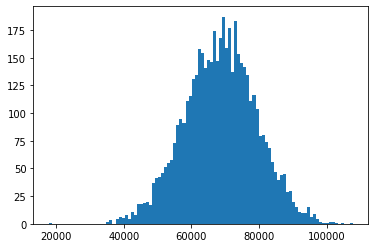

In [7]:
average_income = np.array([inc for inc in america['Avg. Area Income']])
plt.hist(average_income,100)

## Check Most Populated Areas

In [8]:
heighest_population = america[:10].sort_values(by=['Area Population'], ascending=False)
print("\n\nTHe most populated areas are: \n\n ")
heighest_population



THe most populated areas are: 

 


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."


## Plotting Frequencies of Different Coloumn Data

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   2.,
          3.,   3.,   1.,   7.,  12.,  10.,   6.,  14.,  15.,  14.,  11.,
         15.,  21.,  29.,  29.,  31.,  35.,  39.,  37.,  53.,  67.,  67.,
         85.,  71.,  93.,  85.,  96., 102., 109., 116., 114., 126., 115.,
        134., 127., 156., 138., 144., 151., 147., 158., 148., 127., 159.,
        153., 130., 125., 129., 105., 103., 121.,  74., 118.,  88.,  66.,
         63.,  64.,  61.,  57.,  47.,  31.,  37.,  34.,  26.,  23.,  21.,
         19.,  14.,   7.,  13.,   8.,   9.,   7.,   1.,   6.,   3.,   3.,
          3.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 3.23619402,  3.31142797,  3.38666191,  3.46189585,  3.5371298 ,
         3.61236374,  3.68759768,  3.76283163,  3.83806557,  3.91329951,
         3.98853345,  4.0637674 ,  4.13900134,  4.21423528,  4.28946923,
         4.36470317,  4.43993711,  4.51517106,  4.590405  ,  4.66563894,
         4.74087289,  4.81

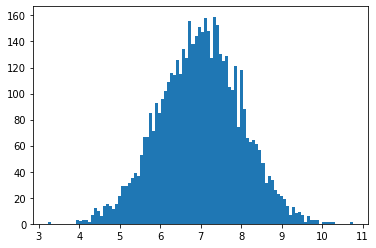

In [9]:
avg_area = np.array([area for area in america['Avg. Area Number of Rooms']])
#avg_area
plt.hist(avg_area,100)

In [10]:
np.sort(avg_area)
avg_area


array([7.00918814, 6.73082102, 8.51272743, ..., 4.80508098, 7.13014386,
       6.7923361 ])

Text(0, 0.5, 'Frequency')

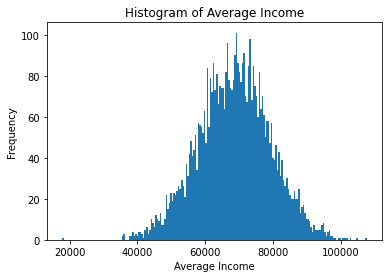

In [11]:
g, grph=plt.subplots()
grph.hist(average_income,200)
grph.set_title('Histogram of Average Income')
grph.set_xlabel('Average Income')
grph.set_ylabel('Frequency')

## Here I am checking a different Dataset BlockChain Tweets

In [12]:
#blockchain_tweets
tweets = np.array([tweet for tweet in blockchain_tweets['text']])
longest_tweet = max(tweets, key=len)
print("The longest tweet:\n\n")
longest_tweet

The longest tweet:




"@TheMIAAllDay247 @refreshmiami @ndahlberg @brianbreslin @MariaDerchi @AuroraMiami @foundersfund @rabois @bunsen @MelissaKrinzman @melmedina305 @marceloclaure @claudiaduran71 @anapauglez @FrancisSuarez @matthaggman Miami's @DroidBrella Technologies publishes its #Cryptocurrency and #BlockchainedOS Vision in an Open Letter to #FinHubSEC, and then kicks off its Unconventional Direct Equity Crowdfunding Campaign #NotForTheUsualVC, https://t.co/8ie7kNYRD9   #Blockchain #FinTech #NFTs #VRLand"

Tokenize


In [13]:
nltk.word_tokenize(longest_tweet)

['@',
 'TheMIAAllDay247',
 '@',
 'refreshmiami',
 '@',
 'ndahlberg',
 '@',
 'brianbreslin',
 '@',
 'MariaDerchi',
 '@',
 'AuroraMiami',
 '@',
 'foundersfund',
 '@',
 'rabois',
 '@',
 'bunsen',
 '@',
 'MelissaKrinzman',
 '@',
 'melmedina305',
 '@',
 'marceloclaure',
 '@',
 'claudiaduran71',
 '@',
 'anapauglez',
 '@',
 'FrancisSuarez',
 '@',
 'matthaggman',
 'Miami',
 "'s",
 '@',
 'DroidBrella',
 'Technologies',
 'publishes',
 'its',
 '#',
 'Cryptocurrency',
 'and',
 '#',
 'BlockchainedOS',
 'Vision',
 'in',
 'an',
 'Open',
 'Letter',
 'to',
 '#',
 'FinHubSEC',
 ',',
 'and',
 'then',
 'kicks',
 'off',
 'its',
 'Unconventional',
 'Direct',
 'Equity',
 'Crowdfunding',
 'Campaign',
 '#',
 'NotForTheUsualVC',
 ',',
 'https',
 ':',
 '//t.co/8ie7kNYRD9',
 '#',
 'Blockchain',
 '#',
 'FinTech',
 '#',
 'NFTs',
 '#',
 'VRLand']

In [14]:
splited_tweet = [nltk.word_tokenize(twt) for twt in tweets]
splited_tweet[100:300]

[['@',
  'swisscpayment',
  'Wonderful',
  'promising',
  'project',
  '.',
  'The',
  'project',
  'is',
  'implemented',
  'very',
  'professionally',
  'and',
  'has',
  'a',
  'clear',
  'development',
  'plan.Without',
  'a',
  'doubt',
  ',',
  'this',
  'is',
  'one',
  'of',
  'the',
  'best',
  'projects',
  'out',
  'there',
  '.',
  'go',
  'to',
  'the',
  'moon',
  '@',
  'Rosianna766Hi',
  '@',
  'asari_dahlan',
  '@',
  'elonmusk',
  '#',
  'SCP',
  '#',
  'Blockchain',
  '#',
  'cryprocurrency',
  '#',
  'DeFi',
  '#',
  'DeFiProject'],
 ['This',
  'is',
  'an',
  'opportunity',
  'for',
  'everyone',
  'both',
  'traders',
  'and',
  'investors',
  '.',
  'I',
  'am',
  'advising',
  'everyone',
  'to',
  'pay',
  'attention',
  'to',
  'this',
  'great',
  'project',
  'because',
  'it',
  'has',
  'been',
  'showing',
  'a',
  'green',
  'light',
  'from',
  'day',
  'one',
  '.',
  'You',
  'can',
  'invest',
  'now',
  '.',
  '#',
  'Treks',
  '#',
  'playtreks',
 

## Plotting Histogram of Number of Words in Tweets

Text(0, 0.5, 'Frequency')

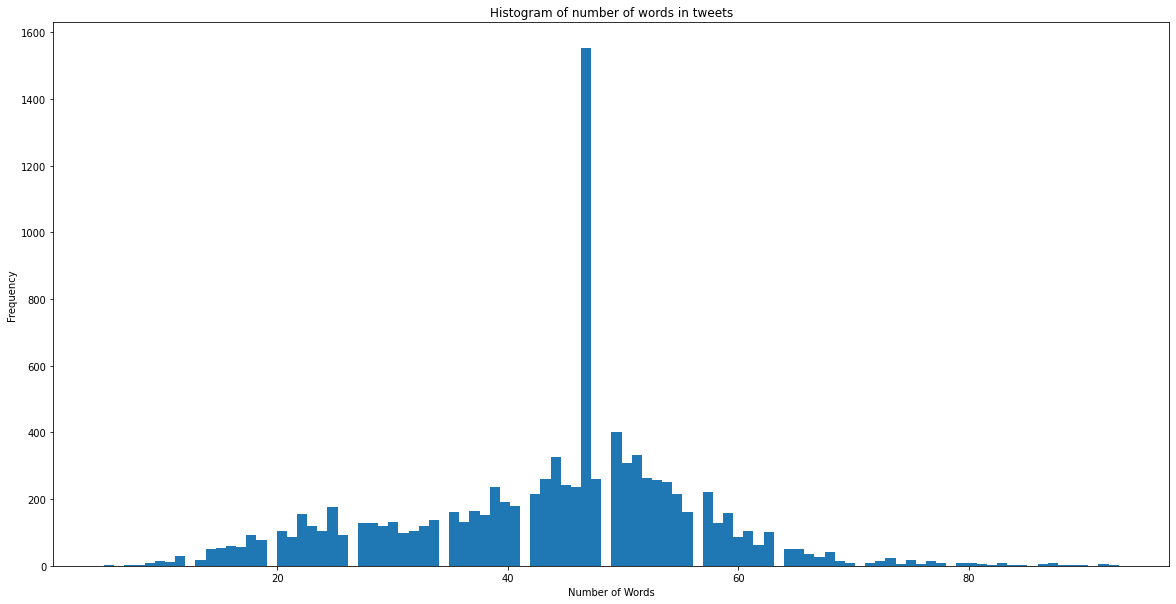

In [15]:
splited_tweet = [[w.lower() for w in tweets] for tweets in splited_tweet]
w_length = np.array([len(tweet) for tweet in splited_tweet])
fig, gph = plt.subplots(figsize=(20, 10))
gph.hist(w_length,100)
gph.set_title("Histogram of number of words in tweets")
gph.set_xlabel('Number of Words')
gph.set_ylabel('Frequency')

In [16]:
np.sort(w_length)

array([ 5,  5,  7, ..., 92, 92, 93])

In [17]:
np.argsort(w_length)

array([2124, 5982, 7976, ...,  209, 6097, 9381], dtype=int64)

## The first 20 Most Common Words in the tweets

In [18]:
every_word = [w for line in splited_tweet for w in line]
every_word_count = Counter(every_word)
every_word_count.most_common(20)

[('#', 68979),
 (':', 15416),
 ('@', 15142),
 ('blockchain', 10654),
 ('$', 9180),
 ('https', 8641),
 ('the', 7368),
 ('.', 6446),
 ('crypto', 5124),
 ('project', 5093),
 ('and', 5072),
 (',', 5058),
 ('this', 4161),
 ('to', 4114),
 ('with', 4054),
 ('!', 3862),
 ('is', 3808),
 ('a', 3772),
 ('-', 3308),
 ('of', 2919)]

## Plotting Frequency of the most common 20 words

Text(0.5, 1.0, '20 Most common words')

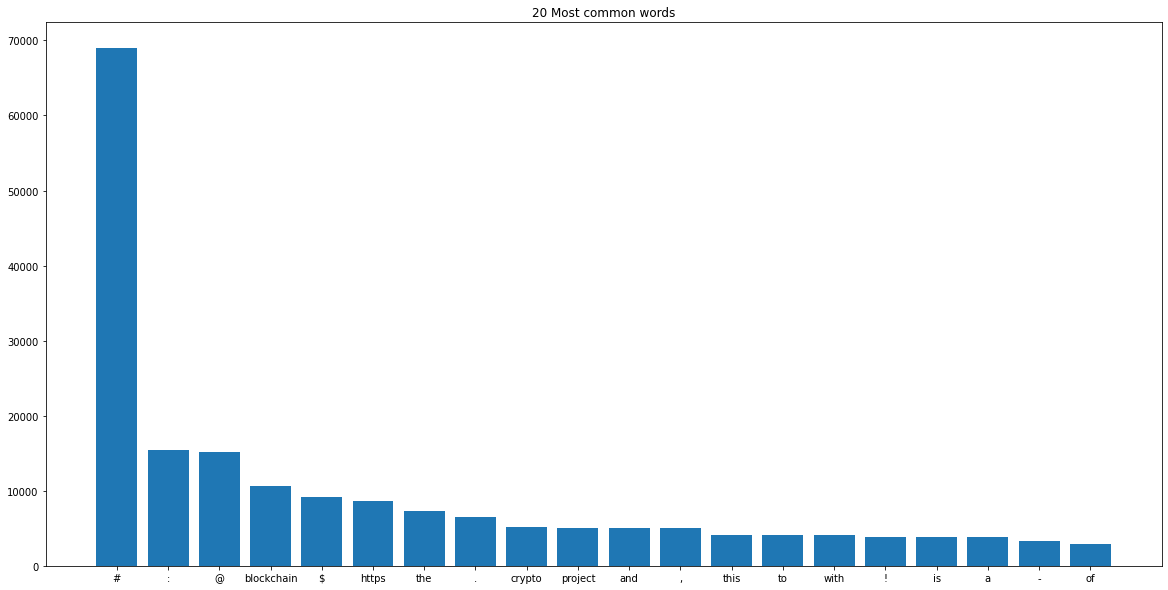

In [19]:
a, b = zip(*every_word_count.most_common(20))
fig, gph = plt.subplots(figsize=(20, 10))
gph.bar(a, b)
gph.set_title("20 Most common words")

## Filtering Words

Text(0.5, 1.0, '20 Most Common Words')

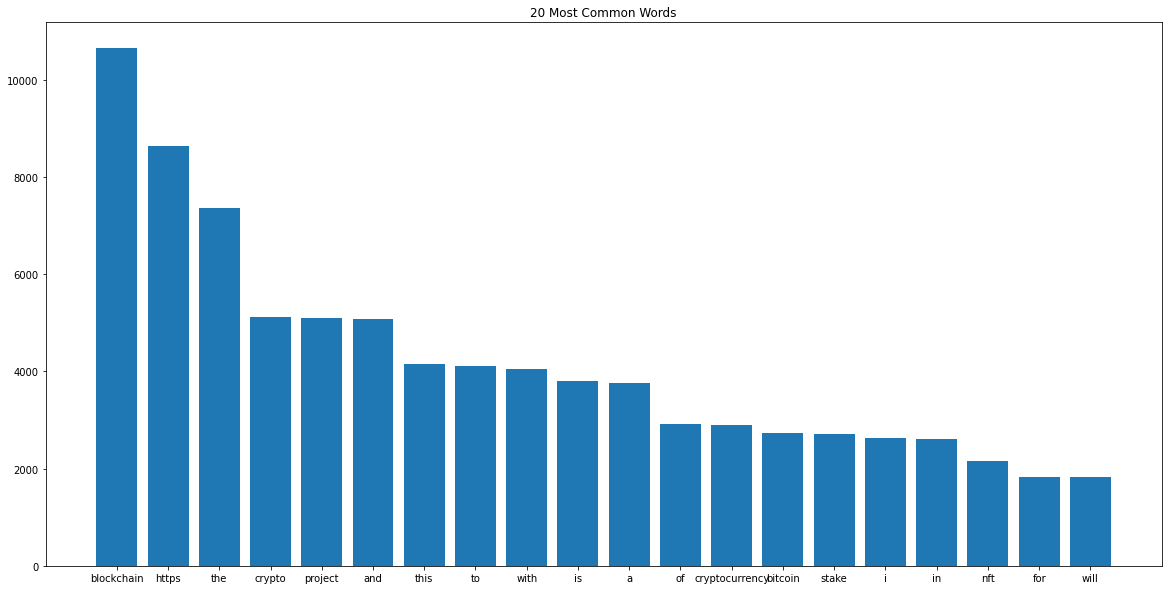

In [20]:
only_words = [w for w in every_word if w.isalpha()]
only_word_count = Counter(only_words)
a, b = zip(*only_word_count.most_common(20))
fig, gph = plt.subplots(figsize=(20, 10))
gph.bar(a, b)
gph.set_title('20 Most Common Words')

In [21]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

## Discarding StopWords

In [22]:
filtered_word_stop = [word for word in only_words if word not in stopwords]
filtered_word_stop_counter = Counter(filtered_word_stop)

Text(0.5, 1.0, 'The 20 most common words')

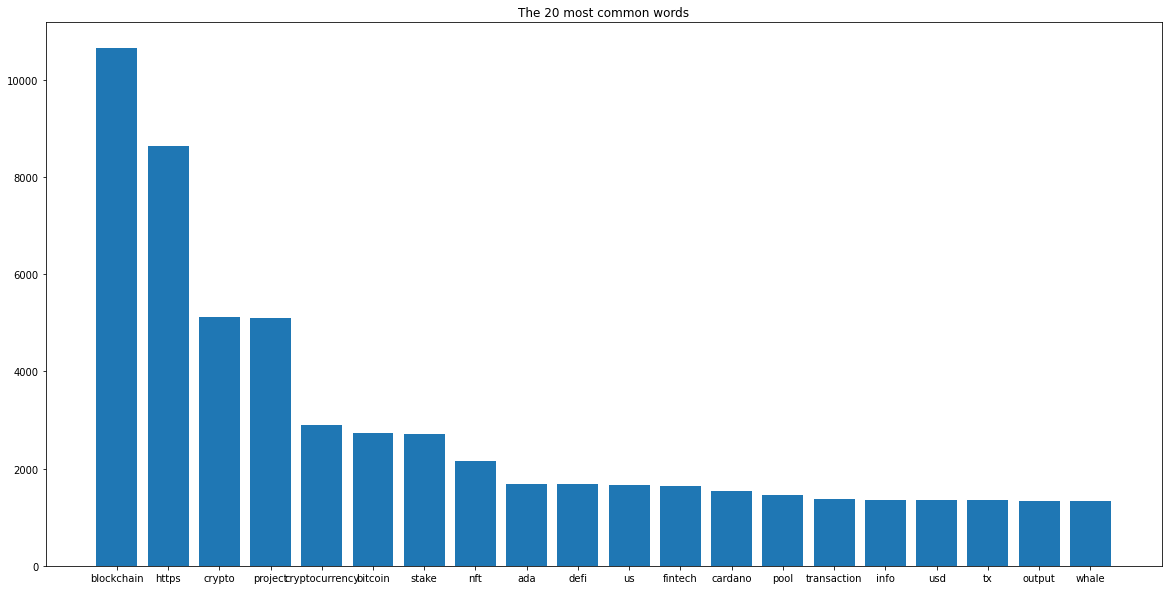

In [23]:
x, y = zip(*filtered_word_stop_counter.most_common(20))
fig, gph = plt.subplots(figsize=(20, 10))
gph.bar(x, y)
gph.set_title('The 20 most common words')

## Check Concordance

In [24]:
def concordance(words, target_word, context_width=3, context_num=20):
    concordance_gen = (only_words[i-context_width:i+context_width] for i, word in enumerate(only_words) if word == target_word)
    return list(islice(concordance_gen, context_num))

In [25]:
concordance(every_word, 'chain')

[['on', 'binance', 'smart', 'chain', 'polygon', 'matic'],
 ['think', 'a', 'cross', 'chain', 'protocol', 'should'],
 ['on', 'binance', 'smart', 'chain', 'aithority', 'https'],
 ['on', 'binance', 'smart', 'chain', 'aithority', 'https'],
 ['the', 'binance', 'smart', 'chain', 'details', 'https'],
 ['of', 'the', 'comdexofficial', 'chain', 'and', 'it'],
 ['on', 'binance', 'smart', 'chain', 'and', 'vice'],
 ['the', 'binance', 'smart', 'chain', 'we', 'offer'],
 ['being', 'a', 'unique', 'chain', 'xdn', 'runs'],
 ['https', 'blockchain', 'supply', 'chain', 'finance', 'market'],
 ['the', 'binance', 'smart', 'chain', 'as', 'nfts'],
 ['the', 'energy', 'web', 'chain', 'ewc', 'our'],
 ['on', 'the', 'bsc', 'chain', 'ops', 'bsc'],
 ['the', 'binance', 'smart', 'chain', 'and', 'is'],
 ['https', 'peak', 'supply', 'chain', 'it', 's'],
 ['entered', 'the', 'pi', 'chain', 'to', 'build'],
 ['entered', 'the', 'pi', 'chain', 'to', 'build'],
 ['entered', 'the', 'pi', 'chain', 'to', 'build'],
 ['entered', 'the', 'p

In [26]:
bigrams = nltk.bigrams(every_word[:50])
list(bigrams)

[('#', 'blockchain'),
 ('blockchain', 'y'),
 ('y', 'i'),
 ('i', 'n'),
 ('n', 'c.'),
 ('c.', 'c'),
 ('c', 'o'),
 ('o', 'm'),
 ('m', 'is'),
 ('is', 'hiring'),
 ('hiring', 'for'),
 ('for', 'the'),
 ('the', 'following'),
 ('following', 'position'),
 ('position', ':'),
 (':', 'director'),
 ('director', 'of'),
 ('of', 'technology'),
 ('technology', '.'),
 ('.', 'link'),
 ('link', ':'),
 (':', 'https'),
 ('https', ':'),
 (':', '//t.co/u0pi79clxp'),
 ('//t.co/u0pi79clxp', 'check'),
 ('check', 'out'),
 ('out', 'this'),
 ('this', 'account'),
 ('account', 'on'),
 ('on', 'opensea'),
 ('opensea', 'https'),
 ('https', ':'),
 (':', '//t.co/kigitx3zxl'),
 ('//t.co/kigitx3zxl', 'via'),
 ('via', '@'),
 ('@', 'opensea'),
 ('opensea', '#'),
 ('#', 'nfts'),
 ('nfts', '#'),
 ('#', 'nft'),
 ('nft', '#'),
 ('#', 'nftart'),
 ('nftart', '#'),
 ('#', 'nftartist'),
 ('nftartist', '#'),
 ('#', 'nftcollector'),
 ('nftcollector', '#'),
 ('#', 'cryptoart'),
 ('cryptoart', '#')]

In [27]:
every_word[:20]

['#',
 'blockchain',
 'y',
 'i',
 'n',
 'c.',
 'c',
 'o',
 'm',
 'is',
 'hiring',
 'for',
 'the',
 'following',
 'position',
 ':',
 'director',
 'of',
 'technology',
 '.']

In [28]:
bigrams = nltk.bigrams(every_word)
cond_freqs = nltk.ConditionalFreqDist(bigrams)

In [29]:
cond_freqs['chain']

FreqDist({',': 8, 'to': 6, '.': 4, 'and': 3, '-': 2, '#': 2, 'is': 2, 'protocol': 1, 'finance': 1, 'as': 1, ...})

In [30]:
cond_freqs['block']

FreqDist({',': 20, 'chain🤯': 8, '709,632': 4, 'height': 4, 'in': 2, '873,116': 2, 'chain': 2, '(': 2, 'minted': 1, 'of': 1, ...})

## Training and Testing Data using SKlearn Libraries

In [31]:
  x = america.drop(['Price','Address'],axis=1).values
  y = america['Price'].values

## Split the dataset into training and testing set

In [32]:
# 70 - 30 percentage
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [33]:
# fit the training data 
lnr = LinearRegression()
lnr.fit(x_train,y_train)

LinearRegression()

## Predicting the results

In [34]:
y_prediction=lnr.predict(x_test)
print(y_prediction)

[ 969608.34680638  953868.1554866   907506.32836087 ... 1423701.02109734
  744400.93315403  488525.83117555]


## Checking Accuracy 

In [35]:
r2_score(y_test,y_prediction)

0.9200757649412096

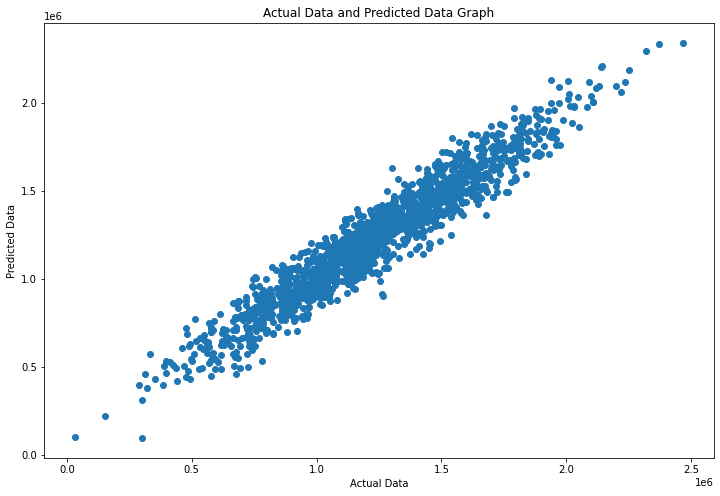

In [51]:
#We got 92% accuracy
#Let's plot a graph of the test and predicted data
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_prediction)
plt.xlabel("Actual Data")
plt.ylabel("Predicted Data")
plt.title ("Actual Data and Predicted Data Graph");

In [37]:
final_data = pd.DataFrame({'Actual Data':y_test, 'Predicted Data':y_prediction})
final_data[0:10]

,Actual Data,Predicted Data
0,8.942511e+05,9.696083e+05
1,9.329794e+05,9.538682e+05
2,9.207479e+05,9.075063e+05
3,6.918549e+05,4.933253e+05
4,7.327332e+05,7.182212e+05
5,9.452522e+05,1.047741e+06
6,6.244828e+05,7.142771e+05
7,8.495661e+05,7.894655e+05
8,1.544380e+06,1.801537e+06
9,1.535262e+06,1.538690e+06
